<a href="https://colab.research.google.com/github/mariola5/Mobile_Price_Classification/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mobile Price Classification - klasyfikacja przedziału cenowego dla telefonów komórkowych

# Import bibliotek



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#Pobranie danych

In [4]:
df = pd.read_csv("/content/train.csv")

#Informacje o danych

In [5]:
df.describe().apply(lambda x: round(x, 2))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00,2000.00
mean,1238.52,0.5,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,9.92,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.5,0.51,1.50
std,439.42,0.5,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,6.06,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.5,0.50,1.12
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,0.00,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.00
25%,851.75,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,5.00,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.0,0.00,0.75
50%,1226.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,10.00,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.0,1.00,1.50
75%,1615.25,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,15.00,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.0,1.00,2.25
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,20.00,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,3.00


#Tworzenie modelu drzewa decyzyjnego

Podział danych na treningowe i testowe

In [6]:
X = df.copy()
y = X.pop('price_range')
X_train = X
y_train = y

In [9]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
y_pred = tree.predict(X_train)

In [11]:
accuracy_score(y_train, y_pred)

0.7695

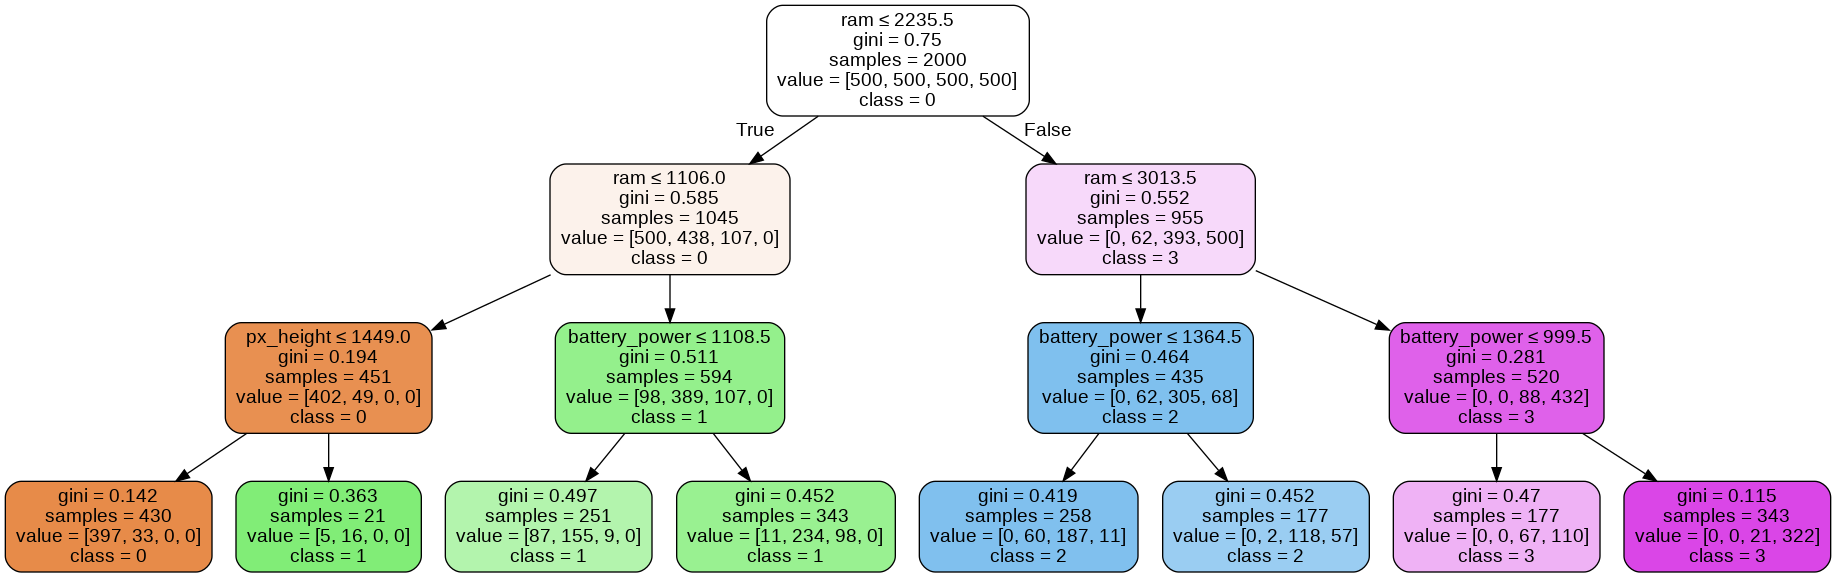

In [13]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=df.columns[:-1],
               class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('selling_price.png')
Image(graph.create_png())